In [169]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.externals.six import StringIO 
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer
import sklearn

# XGBoost
import xgboost as xgb

# Pandas
import pandas as pd

# Numpy
import numpy as np
# Set random seed
np.random.seed(0)

# Plots
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus

In [174]:
df = pd.read_csv('KeplerData.csv')
target = 'Exoplanet Archive Disposition'
# can't include these columns becuase they are all null
invalids = ['Equilibrium Temperature Upper Uncertainty [K]', 'Equilibrium Temperature Lower Uncertainty [K]']
# these are all the features
features = list(set(df.columns[4:]) - set(invalids))
data = df[subset_features + [target]]
withoutna = data.dropna()

In [175]:
train, test = sklearn.model_selection.train_test_split(withoutna)
y_train = train[target]
X_train = train[features]
y_test = test[target]
X_test = test[features]

In [176]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [129]:
cv_scores_rf = cross_val_score(clf, X_test, y_test, cv=5)

print("Mean Score:\t\t", np.mean(cv_scores_rf))
print("Completeness:\t\t", sklearn.metrics.recall_score(y_test, y_pred, average='micro'))
print("Contamination:\t\t", 1 - sklearn.metrics.precision_score(y_test, y_pred, average='micro'))
#sklearn.metrics.f1_score

Mean Score:		 0.8596429689946758
Completeness:		 0.8661060802069858
Contamination:		 0.13389391979301424


[('Transit Duration Upper Uncertainty [hrs]', 0.422415000356962),
 ('Stellar Metallicity Upper Uncertainty [dex]', 0.10740640120870715),
 ('Transit Signal-to-Noise', 0.088672855690688),
 ('Stellar Radius Lower Uncetainty [Solar radii]', 0.07958900021055211),
 ('Stellar Eclipse False Positive Flag', 0.07809236635341973),
 ('Transit Depth Lower Uncertainty [ppm]', 0.06571746176184738),
 ('Maximum Multiple Event Statistic', 0.04908187588018646),
 ('Dec [decimal degrees]', 0.045898933145458884),
 ('PRF Delta Delta SQ (KIC) [arcsec]', 0.04485171295277924),
 ('Centroid Offset False Positive Flag', 0.018274392439399045)]

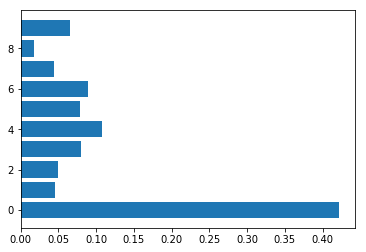

In [165]:
values = list(zip(subset_features, clf.feature_importances_))
plt.barh(range(len(clf.feature_importances_)), [x[1] for x in values])
sortd = sorted(values, reverse = True, key= lambda x: x[1])[:10]
most_important = [s[0] for s in sortd]
sortd

In [ ]:
# here we look at the most important feature
fig, axs = plt.subplots(ncols=1)
data = df[['Transit Duration Upper Uncertainty [hrs]', target]]
data[data < .5].groupby(target).plot(kind='kde', ax=axs)
data[data < .5].groupby(target).describe()